In [1]:
import random
import pandas as pd
import numpy as np

#df = pd.read_csv("data/reddit2017.csv", header=0)
df = pd.read_csv("data/redditSelectedDomains.csv", header=0)
un, counts = np.unique(df["Domain"].as_matrix(), return_counts=True)
#print(un)
#print(counts)

selected_domains = []
for i in range(0, len(un)):
    if counts[i] > 350:
        selected_domains.append(un[i])
#['abcnews.go.com' 'aljazeera.com' 'bbc.co.uk' 'bbc.com' 'bloomberg.com'
# 'cbc.ca' 'cnn.com' 'dw.com' 'edition.cnn.com' 'foxnews.com'
# 'independent.co.uk' 'nytimes.com' 'reuters.com' 'rt.com' 'telegraph.co.uk'
# 'theguardian.com' 'uk.reuters.com' 'washingtonpost.com' 'yahoo.com']

selected_domains = [#'abcnews.go.com', remove because weak
                    #'aljazeera.com', remove because weak
                    #'bbc.co.uk', remove because same as bbc.com
                    'bbc.com', 'bloomberg.com',
 'cbc.ca', 'cnn.com', 'dw.com', #'edition.cnn.com', remove because same as ccn.com
                    'foxnews.com',
 'independent.co.uk', 'nytimes.com', 'reuters.com', 'rt.com', #'telegraph.co.uk', remove because weak prediction
 'theguardian.com', #'uk.reuters.com', remove because same as reuters
                    'washingtonpost.com'#, 'yahoo.com' remove because weak prediction
                   ]

df['Domain'] = df['Domain'].replace('uk.reuters.com', 'reuters.com')
df['Domain'] = df['Domain'].replace('edition.cnn.com', 'cnn.com')
df['Domain'] = df['Domain'].replace('bbc.co.uk', 'bbc.com')
df['Domain'] = df['Domain'].replace('theguardian.co.uk', 'theguardian.com')

df['Domain'] = df['Domain'].replace('bbc.com', 'BBC')
df['Domain'] = df['Domain'].replace('bloomberg.com', 'Bloomberg')
df['Domain'] = df['Domain'].replace('cbc.ca', 'CBC')
df['Domain'] = df['Domain'].replace('cnn.com', 'CNN')
df['Domain'] = df['Domain'].replace('dw.com', 'Deutsche Welle')
df['Domain'] = df['Domain'].replace('foxnews.com', 'Foxnews')
df['Domain'] = df['Domain'].replace('independent.co.uk', 'Independent')
df['Domain'] = df['Domain'].replace('nytimes.com', 'The New York Times')
df['Domain'] = df['Domain'].replace('reuters.com', 'Reuters')
df['Domain'] = df['Domain'].replace('rt.com', 'Russia Today')
df['Domain'] = df['Domain'].replace('theguardian.com', 'The Guardian')
df['Domain'] = df['Domain'].replace('washingtonpost.com', 'The Washington Post')
selected_domains = [w.replace("bbc.com", "BBC") for w in selected_domains]
selected_domains = [w.replace('bloomberg.com', 'Bloomberg') for w in selected_domains]
selected_domains = [w.replace('cbc.ca', 'CBC') for w in selected_domains]
selected_domains = [w.replace('cnn.com', 'CNN') for w in selected_domains]
selected_domains = [w.replace('dw.com', 'Deutsche Welle') for w in selected_domains]
selected_domains = [w.replace('foxnews.com', 'Foxnews') for w in selected_domains]
selected_domains = [w.replace('independent.co.uk', 'Independent') for w in selected_domains]
selected_domains = [w.replace('nytimes.com', 'The New York Times') for w in selected_domains]
selected_domains = [w.replace('reuters.com', 'Reuters') for w in selected_domains]
selected_domains = [w.replace('rt.com', 'Russia Today') for w in selected_domains]
selected_domains = [w.replace('theguardian.com', 'The Guardian') for w in selected_domains]
selected_domains = [w.replace('washingtonpost.com', 'The Washington Post') for w in selected_domains]

df = df[df["Domain"].isin(selected_domains)]
un, counts = np.unique(df["Domain"].as_matrix(), return_counts=True)
print(un)
print(counts)
min_counts = min(counts)
#print(min_counts)

train = pd.DataFrame()
test = pd.DataFrame()

for i in range(0, len(selected_domains)):
    domain = selected_domains[i]
    ddf = df[df["Domain"] == domain]
    ddf = ddf.head(min_counts)
    msk = np.random.rand(len(ddf)) < 0.8
    train = train.append(ddf[msk])
    test = test.append(ddf[~msk])

train.to_csv( "data/train.csv", index=False, quotechar='"',escapechar='\\')
test.to_csv( "data/test.csv", index=False, quotechar='"',escapechar='\\')

['BBC' 'CNN' 'Foxnews' 'Independent' 'Reuters' 'The Guardian']
[11694  3567  1418  4722 12879  8797]


In [2]:
import pandas as pd
train = pd.read_csv("data/train.csv", header=0, encoding='latin1')

In [3]:
train.head

<bound method NDFrame.head of            Created        Domain  \
0     1.495602e+09           BBC   
1     1.495583e+09           BBC   
2     1.495589e+09           BBC   
3     1.495595e+09           BBC   
4     1.495571e+09           BBC   
5     1.495563e+09           BBC   
6     1.495567e+09           BBC   
7     1.495569e+09           BBC   
8     1.495564e+09           BBC   
9     1.495565e+09           BBC   
10    1.495566e+09           BBC   
11    1.495575e+09           BBC   
12    1.495564e+09           BBC   
13    1.495546e+09           BBC   
14    1.495543e+09           BBC   
15    1.495544e+09           BBC   
16    1.495554e+09           BBC   
17    1.495530e+09           BBC   
18    1.495526e+09           BBC   
19    1.495525e+09           BBC   
20    1.495527e+09           BBC   
21    1.495500e+09           BBC   
22    1.495504e+09           BBC   
23    1.495508e+09           BBC   
24    1.495496e+09           BBC   
25    1.495503e+09           BBC  

In [4]:
import nltk
from nltk.corpus import stopwords
#print (stopwords.words("english") )
from bs4 import BeautifulSoup
import re

In [5]:
def title_to_words( raw_title ):
    title_text = BeautifulSoup(raw_title).get_text()     
    letters_only = re.sub("[^a-zA-Z]", " ", title_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [6]:
num_titles = train["Title"].size
clean_train_titles = []
for i in range( 0, num_titles ):
    if( (i+1)%1000 == 0 ):
        print ("Title %d of %d" % ( i+1, num_titles ))
    clean_train_titles.append( title_to_words( train["Title"][i] ) )

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Title 1000 of 6743
Title 2000 of 6743
Title 3000 of 6743
Title 4000 of 6743
Title 5000 of 6743
Title 6000 of 6743


In [16]:
print ("Creating the bag of words...")
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

train_data_features = vectorizer.fit_transform(clean_train_titles)
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

Creating the bag of words...
(6743, 5000)


In [8]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50)
forest = forest.fit( train_data_features, train["Domain"] )

Training the random forest...


In [9]:
test = pd.read_csv("data/test.csv", header=0, encoding='latin1')
print (test.shape)
num_titles = len(test["Title"])
clean_test_titles = [] 

print( "Cleaning and parsing the test set titles...\n")
for i in range(0,num_titles):
    if( (i+1) % 1000 == 0 ):
        print ("Title %d of %d" % (i+1, num_titles))
    clean_title = title_to_words( test["Title"][i] )
    clean_test_titles.append( clean_title )

test_data_features = vectorizer.transform(clean_test_titles)
test_data_features = test_data_features.toarray()

result = forest.predict(test_data_features)

(1765, 3)
Cleaning and parsing the test set titles...



/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Title 1000 of 1765


F1 Score: 0.481586402266


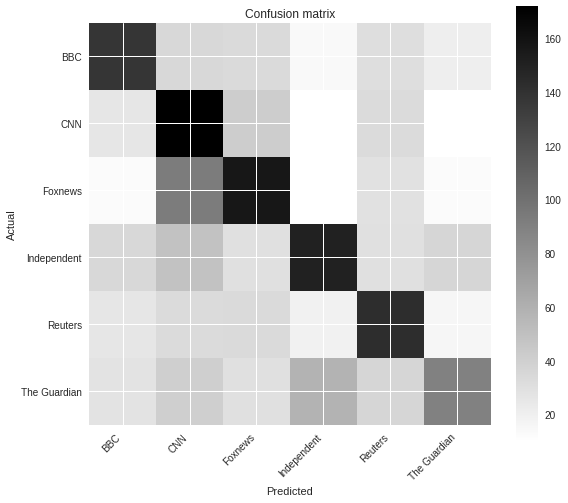

In [11]:
output = pd.DataFrame( data={"Title":test["Title"], "Domain":result} )

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_true = test["Domain"]
y_pred = output["Domain"]

print("F1 Score: " + str(f1_score(y_true, y_pred, average="micro")))

from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(y_true, y_pred)

cm.plot()
plt.show()

In [46]:
f_list = sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), vectorizer.vocabulary_), reverse=True)
for i in range(0,10):
    #print(f_list[i])
    #print(f_list[i][1])
    clean_test_titles = [str(f_list[i][1])]
    test_data_features = vectorizer.transform(clean_test_titles)
    test_data_features = test_data_features.toarray()
    result = forest.predict_proba(test_data_features)
    print (str(f_list[i][1])+" " + str(result))

#print(f_list)

girlfriend [[ 0.32871429  0.34152381  0.04        0.06        0.          0.2297619 ]]
shut [[ 0.32138095  0.32819048  0.04        0.          0.02        0.29042857]]
petersburg [[ 0.448  0.298  0.02   0.02   0.     0.214]]
hard [[ 0.33471429  0.33485714  0.04        0.          0.          0.29042857]]
lost [[ 0.40471429  0.32585714  0.02        0.          0.          0.24942857]]
residents [[ 0.25004762  0.22185714  0.26        0.          0.08        0.18809524]]
posts [[ 0.33138095  0.31819048  0.04        0.          0.04        0.27042857]]
winner [[ 0.32971429  0.30985714  0.1         0.          0.          0.26042857]]
street [[ 0.32471429  0.28985714  0.04        0.          0.          0.34542857]]
barcelona [[ 0.30538095  0.28085714  0.04        0.12        0.          0.2537619 ]]


In [82]:
words = ["children", "kids"]
for word in words:
    test_data_features = vectorizer.transform([word])
    test_data_features = test_data_features.toarray()
    print(forest.predict_proba(test_data_features)[0])
    result = forest.predict(test_data_features)
    print (word + " " + str(result))

[ 0.73671429  0.08285714  0.08        0.04        0.          0.06042857]
children ['BBC']
[ 0.32138095  0.23485714  0.22        0.          0.          0.2237619 ]
kids ['BBC']


In [94]:
for i in range(0,len(f_list)):
    word = str(f_list[i][1])
    test_data_features = vectorizer.transform([word])
    test_data_features = test_data_features.toarray()
    maxProba = max(forest.predict_proba(test_data_features)[0])
    if maxProba > 0.6:
        result = forest.predict(test_data_features)
        #print(forest.predict_proba(test_data_features))
        #if "Independent" in str(result):
            #for j in range(0, int (round(maxProba*20))):
                #print (word)
        print (word + " "+ str(maxProba) +" " + str(result))

refugees 0.42 ['Independent']
trade 0.42 ['Independent']
uk 0.46 ['Independent']
green 0.42 ['Independent']
corbyn 0.44 ['Independent']
